In [51]:
import tensorflow as tf

In [52]:
import numpy as np


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [53]:
tf.random.set_seed(1)
np.random.seed(1)

In [54]:
X = np.random.uniform(  low=-1, high=1, size=(200, 2)   )

In [55]:
X.shape

(200, 2)

In [56]:
X

array([[-1.65955991e-01,  4.40648987e-01],
       [-9.99771250e-01, -3.95334855e-01],
       [-7.06488218e-01, -8.15322810e-01],
       [-6.27479577e-01, -3.08878546e-01],
       [-2.06465052e-01,  7.76334680e-02],
       [-1.61610971e-01,  3.70439001e-01],
       [-5.91095501e-01,  7.56234873e-01],
       [-9.45224814e-01,  3.40935020e-01],
       [-1.65390395e-01,  1.17379657e-01],
       [-7.19226123e-01, -6.03797022e-01],
       [ 6.01489137e-01,  9.36523151e-01],
       [-3.73151644e-01,  3.84645231e-01],
       [ 7.52778305e-01,  7.89213327e-01],
       [-8.29911577e-01, -9.21890434e-01],
       [-6.60339161e-01,  7.56285007e-01],
       [-8.03306332e-01, -1.57784750e-01],
       [ 9.15779060e-01,  6.63305699e-02],
       [ 3.83754228e-01, -3.68968738e-01],
       [ 3.73001855e-01,  6.69251344e-01],
       [-9.63423445e-01,  5.00288630e-01],
       [ 9.77722178e-01,  4.96331309e-01],
       [-4.39112016e-01,  5.78558657e-01],
       [-7.93547987e-01, -1.04212948e-01],
       [ 8.

In [57]:
y = np.ones(   len(X)    ) 

In [58]:
y.shape

(200,)

In [59]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [60]:
y[  X[:, 0] * X[:, 1] < 0   ] = 0

In [61]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

In [62]:
print(y.shape)
print(X.shape)

(200,)
(200, 2)


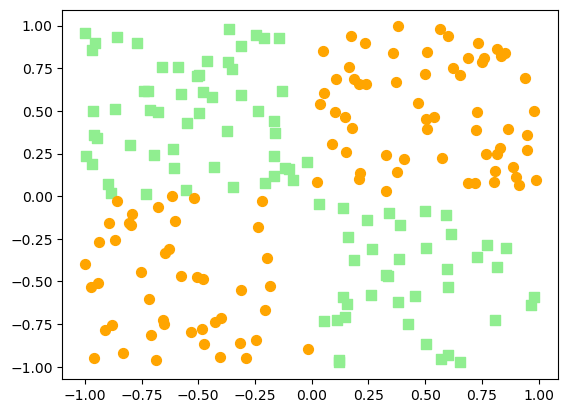

In [63]:
plt.scatter(X[y==0,0],
            X[y==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='class0')
plt.scatter(X[y==1,0],
            X[y==1,1],
            s=50,
            c='orange',
            marker='o',
            label='class1')
plt.show()

In [64]:
X_train = X[:100, :]
y_train = y[:100]

X_test  = X[100:, :]
y_test  = y[100:]

logistic regression

In [65]:
model = tf.keras.Sequential()
model.add(
             tf.keras.layers.Dense(
                                      units=1,
                                      input_shape=(2, ),
                                      activation='sigmoid'
                                  )

)

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(
                 optimizer=tf.keras.optimizers.SGD(),
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=[tf.keras.metrics.BinaryAccuracy()]

             )

In [68]:
history = model.fit(
                       X_train,
                       y_train,
                       validation_data=(X_test, y_test),
                       epochs=200,
                       batch_size=2,
                       verbose=1
                   )

Epoch 1/200
50/50 [==============================] - 1s 6ms/step - loss: 0.8157 - binary_accuracy: 0.4600 - val_loss: 0.8071 - val_binary_accuracy: 0.4800
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 0.8068 - binary_accuracy: 0.4600 - val_loss: 0.7986 - val_binary_accuracy: 0.4800
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7984 - binary_accuracy: 0.4500 - val_loss: 0.7906 - val_binary_accuracy: 0.4800
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7905 - binary_accuracy: 0.4600 - val_loss: 0.7830 - val_binary_accuracy: 0.4800
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7832 - binary_accuracy: 0.4500 - val_loss: 0.7760 - val_binary_accuracy: 0.4900
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.7762 - binary_accuracy: 0.4500 - val_loss: 0.7693 - val_binary_accuracy: 0.4900
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - los

50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6400 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 106/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6857 - binary_accuracy: 0.6700 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 107/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6858 - binary_accuracy: 0.6600 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 108/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6857 - binary_accuracy: 0.6600 - val_loss: 0.6790 - val_binary_accuracy: 0.7100
Epoch 109/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6858 - binary_accuracy: 0.6100 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 110/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6857 - binary_accuracy: 0.6200 - val_loss: 0.6790 - val_binary_accuracy: 0.7000
Epoch 111/200
50/50 [==============================] - 0s 3ms/step - los

In [69]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


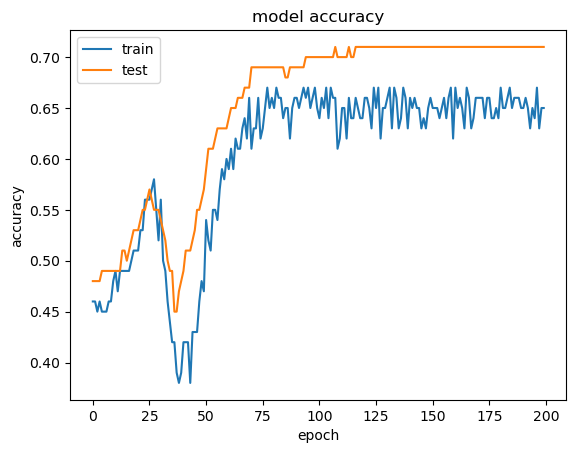

In [70]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

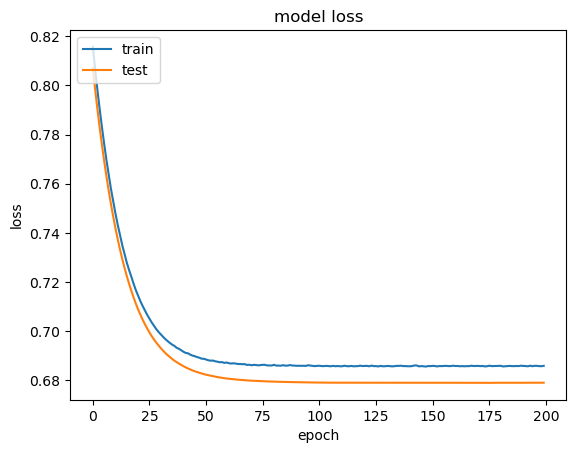

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


DNN

In [83]:
model = tf.keras.Sequential()
model.add(  tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(  tf.keras.layers.Dense(units=3, activation='relu'))
model.add(  tf.keras.layers.Dense(units=4, activation='relu'))

In [84]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 3)                 15        
                                                                 
 dense_16 (Dense)            (None, 4)                 16        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(
                optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[   tf.keras.metrics.BinaryAccuracy()   ]

             )

In [86]:
hist = model.fit(
                    X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs=200,
                    batch_size=2,
                    verbose=1

                )

Epoch 1/200
50/50 [==============================] - 9s 166ms/step - loss: 4.3191 - binary_accuracy: 0.4825 - val_loss: 3.8116 - val_binary_accuracy: 0.4875
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 3.5789 - binary_accuracy: 0.4775 - val_loss: 3.7364 - val_binary_accuracy: 0.5200
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 3.5468 - binary_accuracy: 0.5300 - val_loss: 3.6728 - val_binary_accuracy: 0.5500
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 3.1357 - binary_accuracy: 0.5525 - val_loss: 2.5852 - val_binary_accuracy: 0.5500
Epoch 5/200
50/50 [==============================] - 0s 4ms/step - loss: 2.5544 - binary_accuracy: 0.5600 - val_loss: 2.5544 - val_binary_accuracy: 0.5300
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 2.5340 - binary_accuracy: 0.5650 - val_loss: 2.5427 - val_binary_accuracy: 0.5675
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - l

50/50 [==============================] - 0s 3ms/step - loss: 2.1989 - binary_accuracy: 0.8025 - val_loss: 2.3256 - val_binary_accuracy: 0.7750
Epoch 54/200
50/50 [==============================] - 0s 3ms/step - loss: 2.1909 - binary_accuracy: 0.8075 - val_loss: 2.3197 - val_binary_accuracy: 0.7725
Epoch 55/200
50/50 [==============================] - 0s 3ms/step - loss: 2.1885 - binary_accuracy: 0.8100 - val_loss: 2.3132 - val_binary_accuracy: 0.7750
Epoch 56/200
50/50 [==============================] - 0s 3ms/step - loss: 2.1810 - binary_accuracy: 0.8125 - val_loss: 2.3115 - val_binary_accuracy: 0.7750
Epoch 57/200
50/50 [==============================] - 0s 4ms/step - loss: 2.1773 - binary_accuracy: 0.8025 - val_loss: 2.3155 - val_binary_accuracy: 0.7875
Epoch 58/200
50/50 [==============================] - 0s 3ms/step - loss: 2.1742 - binary_accuracy: 0.8025 - val_loss: 2.3188 - val_binary_accuracy: 0.7775
Epoch 59/200
50/50 [==============================] - 0s 3ms/step - loss: 2.1

50/50 [==============================] - 0s 3ms/step - loss: 2.0909 - binary_accuracy: 0.8425 - val_loss: 2.2501 - val_binary_accuracy: 0.8275
Epoch 106/200
50/50 [==============================] - 0s 3ms/step - loss: 2.0882 - binary_accuracy: 0.8425 - val_loss: 2.1584 - val_binary_accuracy: 0.8225
Epoch 107/200
50/50 [==============================] - 0s 3ms/step - loss: 2.0884 - binary_accuracy: 0.8425 - val_loss: 2.1548 - val_binary_accuracy: 0.8300
Epoch 108/200
50/50 [==============================] - 0s 3ms/step - loss: 2.0872 - binary_accuracy: 0.8425 - val_loss: 2.2473 - val_binary_accuracy: 0.8300
Epoch 109/200
50/50 [==============================] - 0s 3ms/step - loss: 2.0889 - binary_accuracy: 0.8425 - val_loss: 2.1550 - val_binary_accuracy: 0.8275
Epoch 110/200
50/50 [==============================] - 0s 3ms/step - loss: 2.0861 - binary_accuracy: 0.8425 - val_loss: 2.1530 - val_binary_accuracy: 0.8250
Epoch 111/200
50/50 [==============================] - 0s 3ms/step - los

50/50 [==============================] - 0s 5ms/step - loss: 2.0726 - binary_accuracy: 0.8550 - val_loss: 2.1330 - val_binary_accuracy: 0.8350
Epoch 158/200
50/50 [==============================] - 0s 4ms/step - loss: 2.0724 - binary_accuracy: 0.8525 - val_loss: 2.1350 - val_binary_accuracy: 0.8300
Epoch 159/200
50/50 [==============================] - 0s 5ms/step - loss: 2.0731 - binary_accuracy: 0.8525 - val_loss: 2.1507 - val_binary_accuracy: 0.8350
Epoch 160/200
50/50 [==============================] - 0s 5ms/step - loss: 2.0709 - binary_accuracy: 0.8575 - val_loss: 2.1320 - val_binary_accuracy: 0.8350
Epoch 161/200
50/50 [==============================] - 0s 5ms/step - loss: 2.0692 - binary_accuracy: 0.8525 - val_loss: 2.2212 - val_binary_accuracy: 0.8375
Epoch 162/200
50/50 [==============================] - 0s 4ms/step - loss: 2.0732 - binary_accuracy: 0.8525 - val_loss: 2.1347 - val_binary_accuracy: 0.8300
Epoch 163/200
50/50 [==============================] - 0s 4ms/step - los

In [80]:
print(hist.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


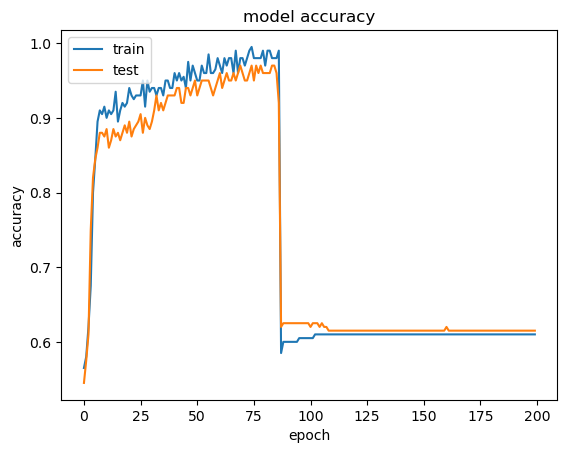

In [81]:
history = hist


# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

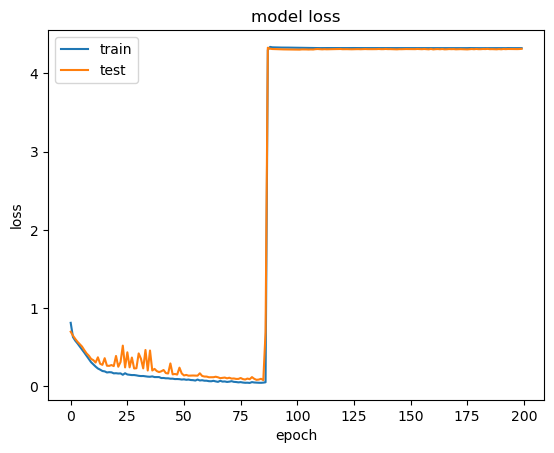

In [82]:
history = hist

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()